<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/udemy_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/My Drive/Kaggle'

In [3]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d andrewmvd/udemy-courses

  0% 0.00/200k [00:00<?, ?B/s]
100% 200k/200k [00:00<00:00, 23.1MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Archive:  udemy.zip
  inflating: udemy_courses.csv       

Archive:  udemy-courses.zip
replace udemy_courses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: udemy_courses.csv       

2 archives were successfully processed.


In [6]:
data=pd.read_csv('udemy_courses.csv')
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [9]:
import pandas as pd
import seaborn as sns

In [11]:
data.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [18]:
data=pd.read_csv('udemy_courses.csv',parse_dates=['published_timestamp'])
data.dtypes


course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

Display top 5 rows of datasets

In [19]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


Display last 5 rows of datasets

In [20]:
data.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


Find the shape of datasets

In [21]:
data.shape

(3678, 12)

In [23]:
print("Number of rows",data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 3678
Number of columns 12


Getting information about our dataset like total number of rows,columns,datatypes of each column and memory requirment

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

 check Null value in dataset

In [26]:
print("Any missing value?",data.isnull().values.any())

Any missing value? False


In [27]:
data.isnull()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,False,False,False,False,False,False,False,False,False,False,False,False
3674,False,False,False,False,False,False,False,False,False,False,False,False
3675,False,False,False,False,False,False,False,False,False,False,False,False
3676,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

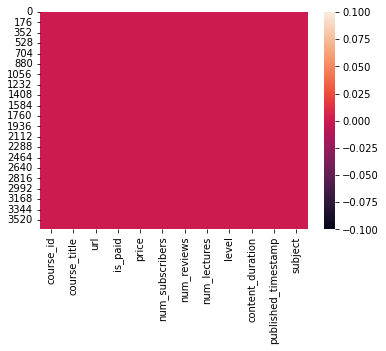

In [29]:
sns.heatmap(data.isnull())

Check for duplicate data and drop them

In [30]:
dup=data.duplicated().any()
print("Are there any duplicated value in data?",dup)

Are there any duplicated value in data? True


In [31]:
data=data.drop_duplicates()
dup=data.duplicated().any()
print("Are there any duplicated value in data?",dup)

Are there any duplicated value in data? False


Find out number of courses per subjects

In [34]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [36]:
data['subject']

0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3673     Web Development
3674     Web Development
3675     Web Development
3676     Web Development
3677     Web Development
Name: subject, Length: 3672, dtype: object

In [37]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


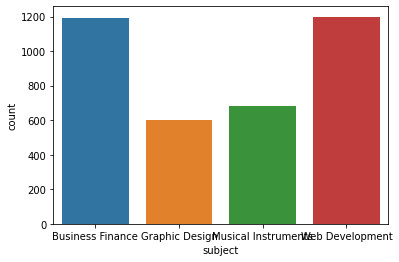

In [38]:
sns.countplot(data['subject'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Nunber of courses per subject')

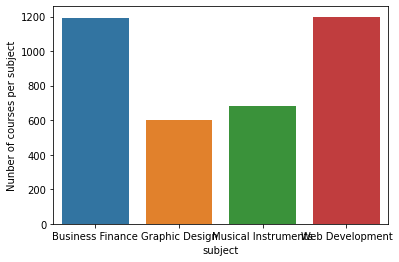

In [39]:
import matplotlib.pyplot as plt
sns.countplot(data['subject'])
plt.xlabel('subject')
plt.ylabel("Nunber of courses per subject")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


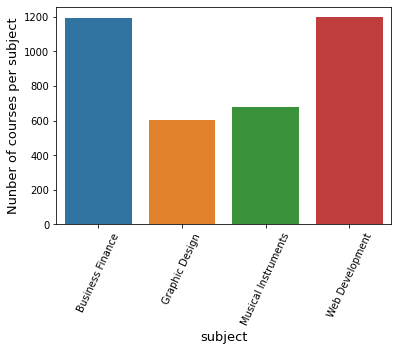

In [46]:
sns.countplot(data['subject'])
plt.xlabel('subject',fontsize=13)
plt.ylabel("Nunber of courses per subject",fontsize=13)
plt.xticks(rotation=65)
plt.show();

For which levels Udemy prividing the courses

In [47]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [48]:
data['level']

0               All Levels
1               All Levels
2       Intermediate Level
3               All Levels
4       Intermediate Level
               ...        
3673            All Levels
3674        Beginner Level
3675            All Levels
3676            All Levels
3677        Beginner Level
Name: level, Length: 3672, dtype: object

In [49]:
data['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


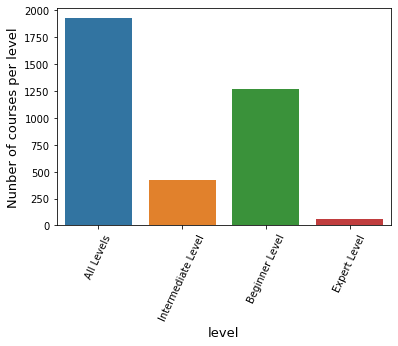

In [52]:
sns.countplot(data['level'])
plt.xlabel('level',fontsize=13)
plt.ylabel("Nunber of courses per level",fontsize=13)
plt.xticks(rotation=65)
plt.show();

Display count paid and free courses

In [53]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [54]:
data['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


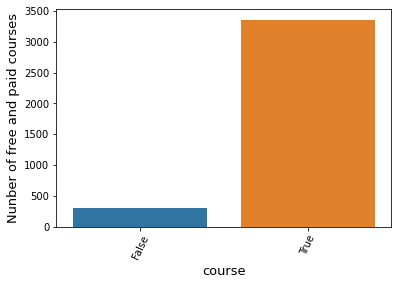

In [58]:
sns.countplot(data['is_paid'])
plt.xlabel('course',fontsize=13)
plt.ylabel("Nunber of free and paid courses",fontsize=13)
plt.xticks(rotation=65)
plt.show();

Which course has more lectures(Free or paid)?

In [59]:
data.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


Which courses have higher number of subscribers free or paid?

In [60]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

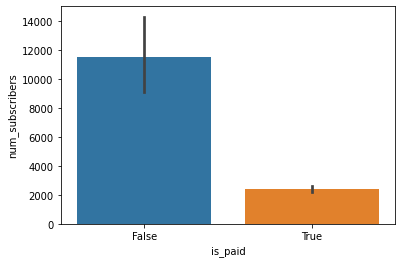

In [61]:
sns.barplot(x="is_paid",y='num_subscribers',data=data)

Which level has the highest number of subscribers?

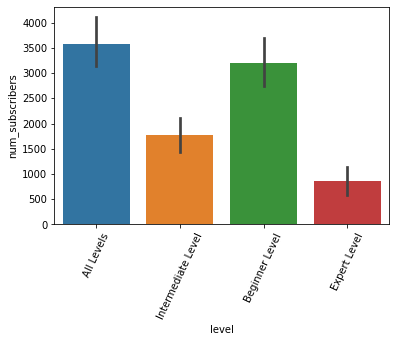

In [64]:
sns.barplot(x="level",y='num_subscribers',data=data)
plt.xticks(rotation=65)
plt.show()

Most popular course title

In [65]:
data['num_subscribers'].max()

268923

In [66]:
data['num_subscribers'].max()==data['num_subscribers']

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: num_subscribers, Length: 3672, dtype: bool

In [69]:
data[data['num_subscribers'].max()==data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

Display 10 most popular courses as per number of subscribers

In [70]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [72]:
data.sort_values(by='num_subscribers',ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.500000,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.500000,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.000000,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.000000,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.500000,2016-03-08 22:28:36+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
886,1087466,Stop Creditors from Harassing you and Avoid Ba...,https://www.udemy.com/stop-creditor-harassment...,True,20,0,0,7,Beginner Level,0.616667,2017-02-02 16:22:37+00:00,Business Finance
887,1058852,Learn to trade using technical analysis,https://www.udemy.com/learn-to-trade-using-tec...,True,50,0,0,6,Intermediate Level,0.533333,2017-05-02 13:15:53+00:00,Business Finance
888,1083744,How to Invest Using ETFs from Former Wall Stre...,https://www.udemy.com/etf-master-class/,True,200,0,0,10,All Levels,2.000000,2017-02-15 22:34:00+00:00,Business Finance


In [73]:
data.sort_values(by='num_subscribers',ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


In [78]:
top_10= data.sort_values(by='num_subscribers',ascending=False).head(10)
                                                                    
                                                                  

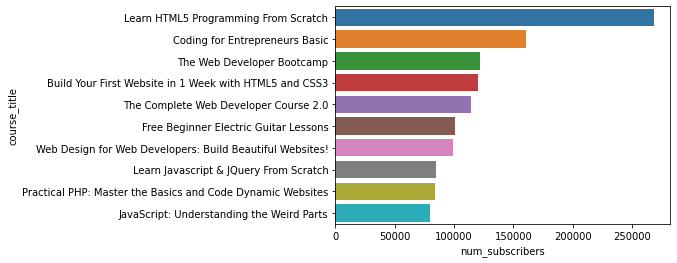

In [79]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)

Find the course which is having the higest number of review.

In [80]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

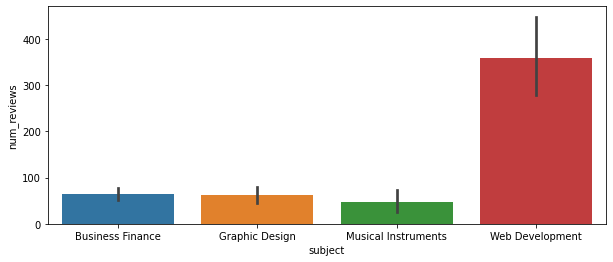

In [82]:
plt.figure(figsize=(10,4))
sns.barplot(x='subject',y='num_reviews',data=data)

Does price affect number of review?

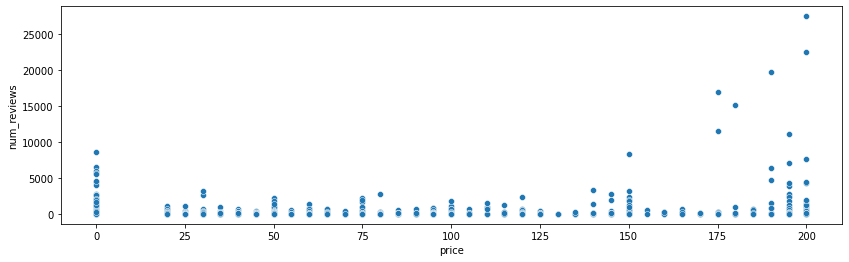

In [85]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(14,4))
sns.scatterplot(x='price',y='num_reviews',data=data)

Find total number of courses related to python

In [86]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [88]:
data['course_title'].str.contains('python',case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: course_title, Length: 3672, dtype: bool

In [90]:
data[data['course_title'].str.contains('python',case=False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance
536,529828,Python for Trading & Investing,https://www.udemy.com/python-for-trading-inves...,True,95,638,25,36,All Levels,5.0,2015-06-17 22:23:31+00:00,Business Finance
762,1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,5.5,2017-01-27 17:11:28+00:00,Business Finance
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13 21:40:32+00:00,Business Finance
1682,546848,Learn to code in Python and learn Adobe Photos...,https://www.udemy.com/learn-to-code-in-python-...,True,50,1132,1,29,All Levels,2.0,2015-07-08 00:15:12+00:00,Graphic Design
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development


In [91]:
len(data[data['course_title'].str.contains('python',case=False)])

29

Display 10 most popular course python